In [61]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [62]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [63]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

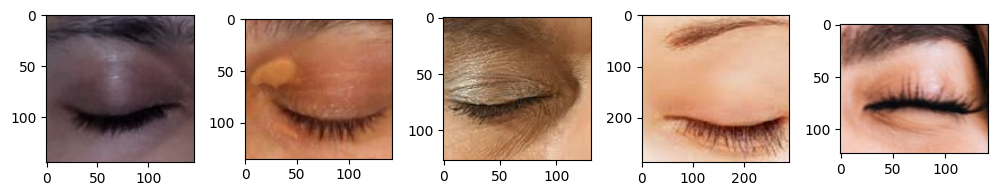

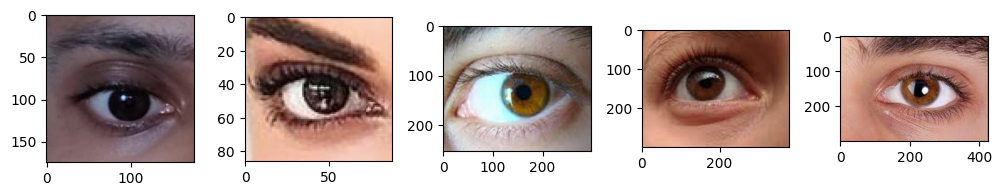

In [64]:
data_path = 'train'

directories = ['/Closed', '/Open']

for j in directories:
    plot_imgs(data_path+j)

In [65]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
train_data_path = 'train'
test_data_path = 'test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (24,24),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (24,24),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [67]:
classes = 2

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (24,24,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 3, 3, 128)       

In [68]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [69]:
model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [70]:
num_epochs = 25
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [71]:
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

C:\Users\mamto\AppData\Local\Temp\ipykernel_13620\2180583923.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,


Epoch 1/25
9/9 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5506
Epoch 1: val_accuracy improved from -inf to 0.50781, saving model to yawn_detection1.h5
9/9 [==============================] - 13s 1s/step - loss: 0.6873 - accuracy: 0.5506 - val_loss: 0.6661 - val_accuracy: 0.5078
Epoch 2/25
9/9 [==============================] - ETA: 0s - loss: 0.6345 - accuracy: 0.8134
Epoch 2: val_accuracy improved from 0.50781 to 0.72656, saving model to yawn_detection1.h5
9/9 [==============================] - 5s 540ms/step - loss: 0.6345 - accuracy: 0.8134 - val_loss: 0.5623 - val_accuracy: 0.7266
Epoch 3/25
9/9 [==============================] - ETA: 0s - loss: 0.4767 - accuracy: 0.8201
Epoch 3: val_accuracy improved from 0.72656 to 0.82031, saving model to yawn_detection1.h5
9/9 [==============================] - 5s 573ms/step - loss: 0.4767 - accuracy: 0.8201 - val_loss: 0.3811 - val_accuracy: 0.8203
Epoch 4/25
9/9 [==============================] - ETA: 0s - loss: 0.3

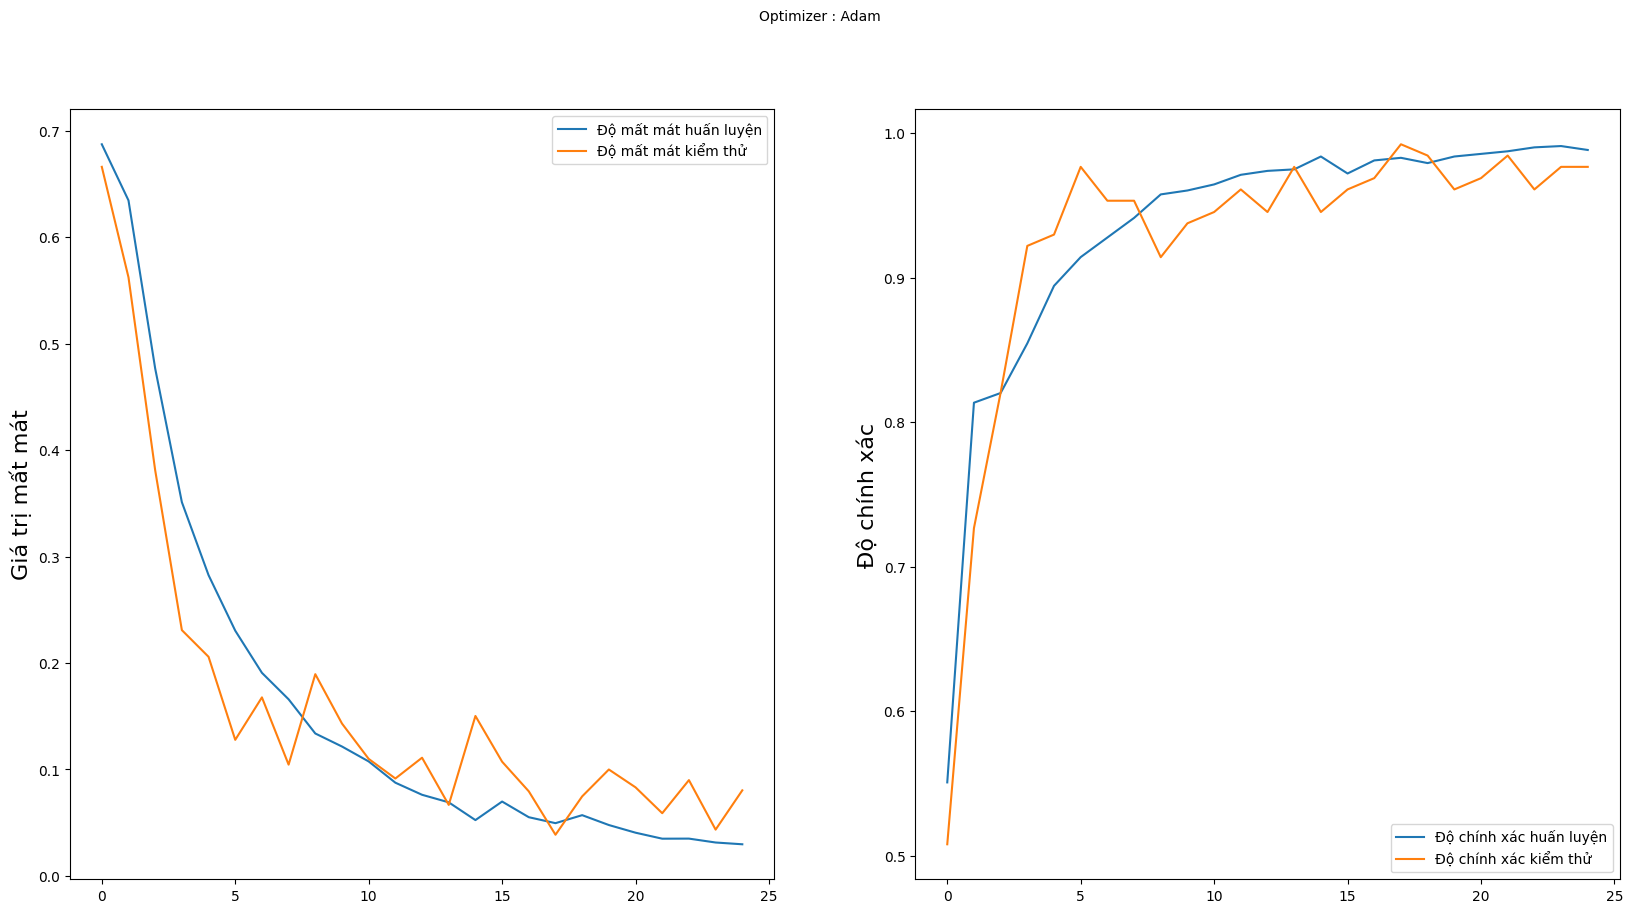

In [72]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Giá trị mất mát', fontsize=16)
plt.plot(history.history['loss'], label='Độ mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Độ mất mát kiểm thử')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Độ chính xác', fontsize=16)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm thử')
plt.legend(loc='lower right')
plt.show()

2/2 [==============================] - 1s 347ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

      Closed       0.60      0.57      0.58       109
        Open       0.59      0.61      0.60       109

    accuracy                           0.59       218
   macro avg       0.59      0.59      0.59       218
weighted avg       0.59      0.59      0.59       218



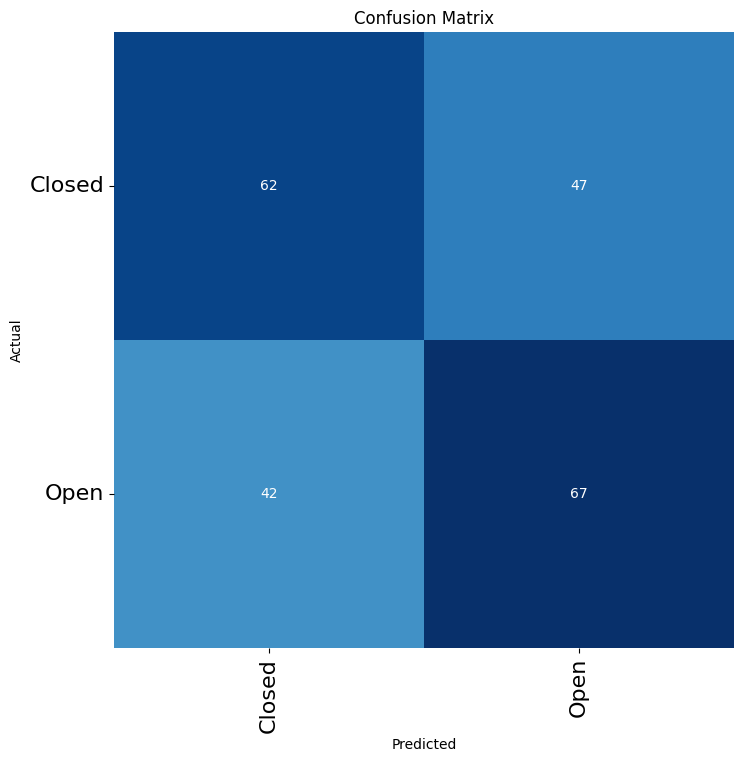

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_set, model)

2/2 [==============================] - 1s 237ms/step
Confusion Matrix


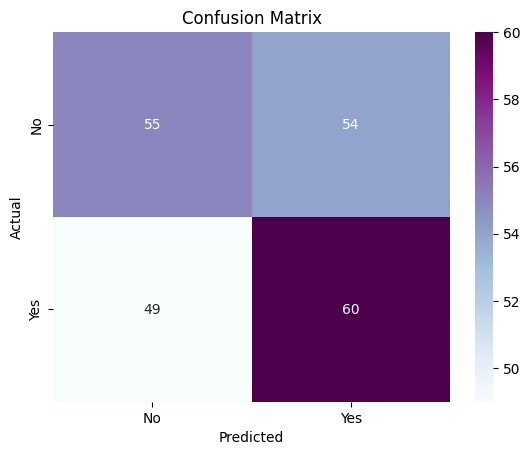

In [74]:
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
qd = confusion_matrix(test_set.classes, y_pred)
ax = sns.heatmap(qd, annot=True, cmap="BuPu")
ax.set_title("Confusion Matrix");
ax.set_xlabel("Predicted")
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()